# (a) Calculating the log returns of Copper

In [1]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
#Reading the data from Excel
data = pd.read_csv("commodity.csv")
data

,OBS,COPPER,GOLD,LEAD,SILVER
0,5/01/1989,3039.1050,363.6,4823.0596,5.091
1,5/02/1989,2976.1080,361.8,4696.2984,5.110
2,5/03/1989,2924.9100,359.9,4592.1087,5.045
3,5/04/1989,3005.0100,360.6,4678.8006,5.076
4,5/05/1989,2969.1990,360.6,4623.0428,5.076
...,...,...,...,...,...
995,2/22/1993,1872.8360,368.6,2766.1788,4.256
996,2/23/1993,1872.1830,374.5,2757.7256,4.392
997,2/24/1993,1873.7095,375.1,2752.4793,4.389
998,2/25/1993,1883.5065,377.2,2785.7061,4.489


#R = ln(P_t/P_t-1) 

In [4]:
data['R_c']= 100*np.log(data['COPPER']/data['COPPER'].shift(1))
data['R_ca']= abs(data['R_c'])
data['R_c^2'] = data['R_c']*data['R_c']

In [5]:
print(data.head())

         OBS    COPPER   GOLD       LEAD  SILVER       R_c      R_ca     R_c^2
0  5/01/1989  3039.105  363.6  4823.0596   5.091       NaN       NaN       NaN
1  5/02/1989  2976.108  361.8  4696.2984   5.110 -2.094666  2.094666  4.387625
2  5/03/1989  2924.910  359.9  4592.1087   5.045 -1.735270  1.735270  3.011160
3  5/04/1989  3005.010  360.6  4678.8006   5.076  2.701718  2.701718  7.299283
4  5/05/1989  2969.199  360.6  4623.0428   5.076 -1.198868  1.198868  1.437284


In [6]:
# Dropping NA's is required to use numpy's polyfit
data_s = data.dropna(subset=['R_c'])
print(data_s.head())

         OBS    COPPER   GOLD       LEAD  SILVER       R_c      R_ca     R_c^2
1  5/02/1989  2976.108  361.8  4696.2984   5.110 -2.094666  2.094666  4.387625
2  5/03/1989  2924.910  359.9  4592.1087   5.045 -1.735270  1.735270  3.011160
3  5/04/1989  3005.010  360.6  4678.8006   5.076  2.701718  2.701718  7.299283
4  5/05/1989  2969.199  360.6  4623.0428   5.076 -1.198868  1.198868  1.437284
5  5/08/1989  2926.000  359.6  4506.0400   5.067 -1.465592  1.465592  2.147959


# (b) (i) Summary statistics

In [7]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


In [8]:
from scipy import stats
Rc= stats.describe(data_s['R_c'])
Rca=stats.describe(data_s['R_ca'])
Rc2= stats.describe(data_s['R_c^2'])

In [9]:
print(Rc)

DescribeResult(nobs=999, minmax=(-10.037918530762216, 6.633374744570145), mean=-0.04782604641413218, variance=2.988453995572702, skewness=-0.13642056309555745, kurtosis=2.6804296191644488)


In [10]:
print(Rca)

DescribeResult(nobs=999, minmax=(0.0, 10.037918530762216), mean=1.253037876686897, variance=1.4190664473695909, skewness=1.9654561151759231, kurtosis=6.1340532142037)


In [11]:
print(Rc2)

DescribeResult(nobs=999, minmax=(0.0, 100.75980843021948), mean=2.987749880847295, variance=41.92050785896556, skewness=6.482381876231292, kurtosis=67.57368954840659)


# b(iii) Jacques-Bera test

In [12]:
stats.jarque_bera(data_s['R_c'])

Jarque_beraResult(statistic=302.1619199254945, pvalue=0.0)

In [13]:
stats.jarque_bera(data_s['R_ca'])

Jarque_beraResult(statistic=2209.400046567293, pvalue=0.0)

In [14]:
stats.jarque_bera(data_s['R_c^2'])

Jarque_beraResult(statistic=197064.7637384692, pvalue=0.0)

Interpretation: The JB tests show there is a non-normal distribution  (p-value <0.05), given the Copper's daily returns is negatively skewed and has an excess Kurtosis of 2.68. 

# b(iv) Histogram

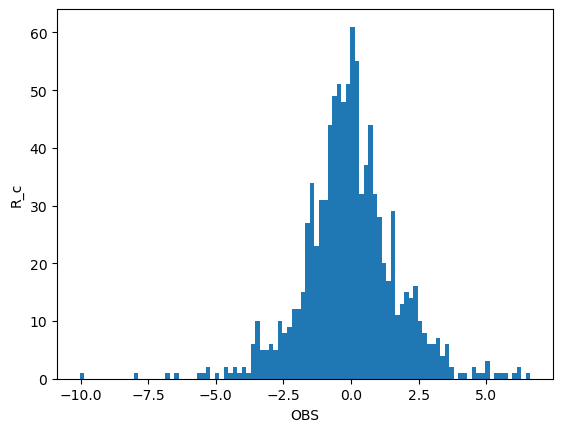

<Figure size 640x480 with 0 Axes>

In [15]:
_ = plt.hist(data['R_c'],bins=100)
_ = plt.xlabel('OBS')
_ = plt.ylabel('R_c')
plt.show()
plt.savefig('C:\\Users\\rluck\\OneDrive\\myplot.png')

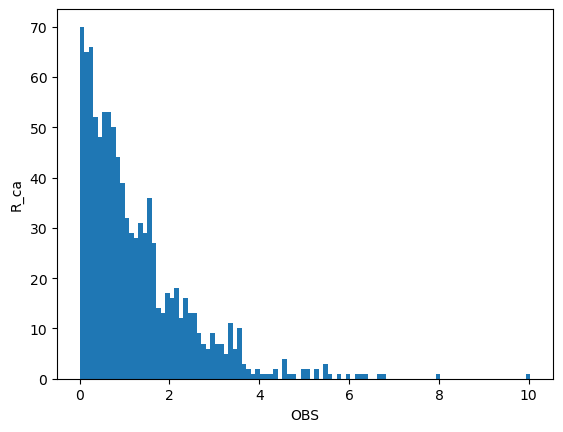

In [16]:
_ = plt.hist(data['R_ca'],bins=100)
_ = plt.xlabel('OBS')
_ = plt.ylabel('R_ca')
plt.show()

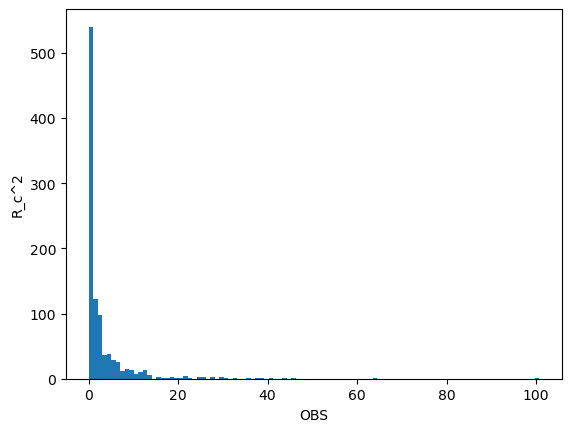

In [17]:
_ = plt.hist(data['R_c^2'],bins=100)
_ = plt.xlabel('OBS')
_ = plt.ylabel('R_c^2')
plt.show()

# Plotting charts

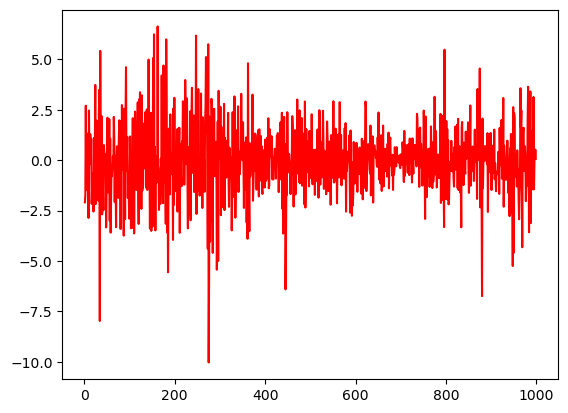

In [18]:
plt.plot(data.R_c,color='red')

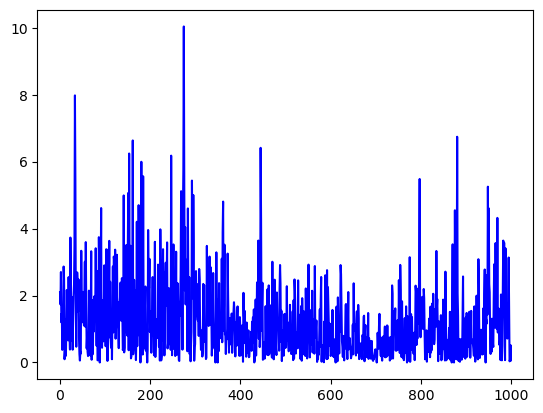

In [19]:
plt.plot(data.R_ca,color='blue')

In [20]:
dta= data_s['R_c']

# Computing ACF and PACF 

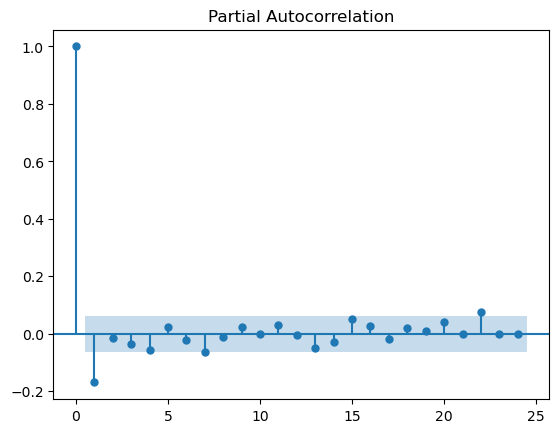

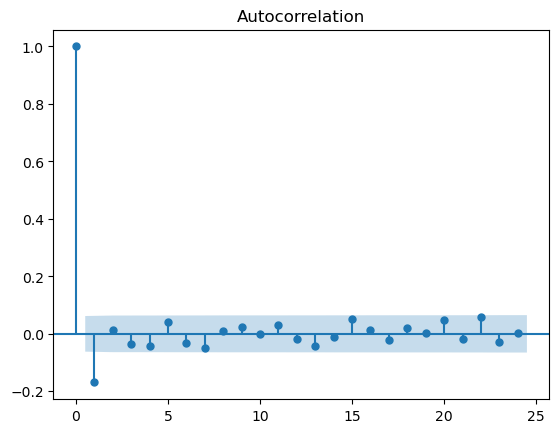

In [21]:
>>> sm.graphics.tsa.plot_pacf(dta.values.squeeze(), lags=24)
sm.graphics.tsa.plot_acf(dta.values.squeeze(),lags=24)
>>> plt.show()

In [22]:
r,q,p = sm.tsa.acf(dta.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print (table.set_index('lag'))

            AC          Q      Prob(>Q)
lag                                    
1.0  -0.169258  28.705576  8.426077e-08
2.0   0.013418  28.886150  5.338906e-07
3.0  -0.034927  30.110942  1.307854e-06
4.0  -0.042273  31.906892  1.998778e-06
5.0   0.040801  33.581630  2.884062e-06
6.0  -0.030759  34.534399  5.303518e-06
7.0  -0.048466  36.902332  4.894754e-06
8.0   0.008219  36.970498  1.165359e-05
9.0   0.023870  37.546022  2.102220e-05
10.0 -0.000546  37.546323  4.550870e-05
11.0  0.031456  38.547811  6.320925e-05
12.0 -0.019199  38.921279  1.084230e-04
13.0 -0.042012  40.711358  1.061207e-04
14.0 -0.010708  40.827757  1.893163e-04
15.0  0.050749  43.445094  1.342517e-04
16.0  0.012242  43.597563  2.270240e-04
17.0 -0.021301  44.059599  3.356420e-04
18.0  0.019068  44.430240  5.005839e-04
19.0  0.001336  44.432061  8.226156e-04
20.0  0.046795  46.668800  6.519565e-04
21.0 -0.017221  46.972047  9.472905e-04
22.0  0.060033  50.660881  4.770893e-04
23.0 -0.026672  51.389781  6.034195e-04


/usr/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/usr/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


As per the above correlograms, the first autocorrelation of -0.169 is statistically significant as it exceeds the bands (i.e: the blue shaded area) in the chart. We can infer that the log price of Copper does not follow a random walk and the efficient market hypothesis does not hold. For squared returns (R_c^2) and absolute returns (R_ca), the autocorrelations are even stronger, as demonstrated by the following ACF and PACF charts. 

In [23]:
dta_1= data_s['R_ca']

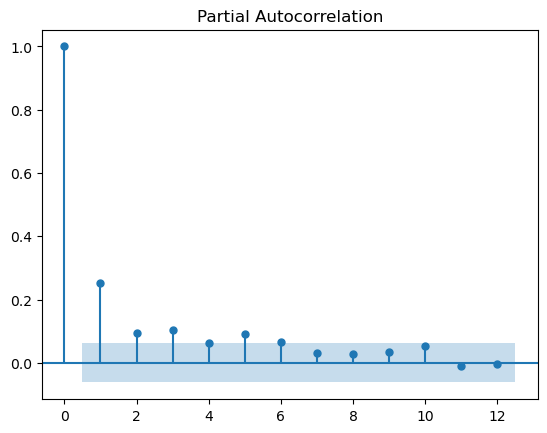

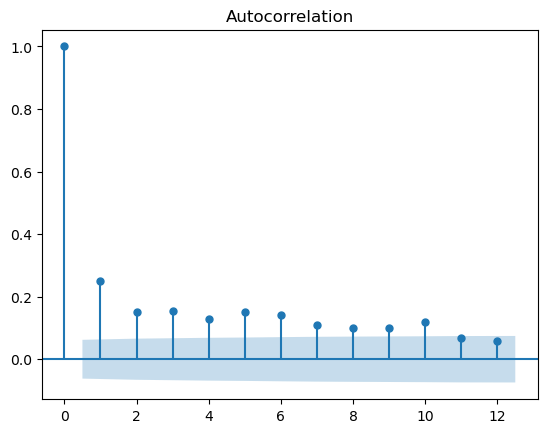

In [24]:
>>> sm.graphics.tsa.plot_pacf(dta_1.values.squeeze(), lags=12)
sm.graphics.tsa.plot_acf(dta_1.values.squeeze(),lags=12)
>>> plt.show()

In [25]:
r,q,p = sm.tsa.acf(dta_1.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print (table.set_index('lag'))

            AC           Q      Prob(>Q)
lag                                     
1.0   0.250814   63.033756  2.031943e-15
2.0   0.152524   86.367442  1.760144e-19
3.0   0.153909  110.150402  1.018515e-23
4.0   0.127490  126.485836  2.196721e-26
5.0   0.150763  149.352358  1.833912e-30
6.0   0.140662  169.277473  6.400788e-34
7.0   0.109180  181.293948  1.038331e-35
8.0   0.098477  191.079671  4.827095e-37
9.0   0.100862  201.355470  1.722055e-38
10.0  0.119461  215.785175  8.144212e-41
11.0  0.068930  220.594251  3.883007e-41
12.0  0.056851  223.868911  3.739222e-41
13.0  0.059601  227.471661  2.983310e-41
14.0  0.078392  233.710486  6.632136e-42
15.0  0.076650  239.681269  1.646911e-42
16.0  0.074328  245.301502  4.753518e-43
17.0  0.079118  251.675918  9.486837e-44
18.0  0.109714  263.946256  1.175163e-45
19.0  0.103477  274.872190  2.735358e-47
20.0  0.085096  282.268874  3.322181e-48
21.0  0.129912  299.525625  3.972767e-51
22.0  0.105942  311.013572  7.090149e-53
23.0  0.107406  

/usr/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/usr/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [26]:
dta_2= data_s['R_c^2']

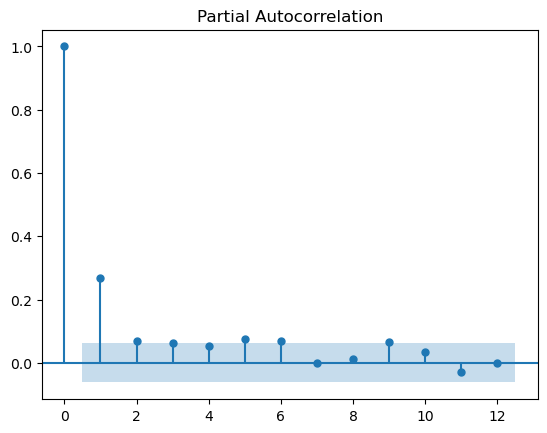

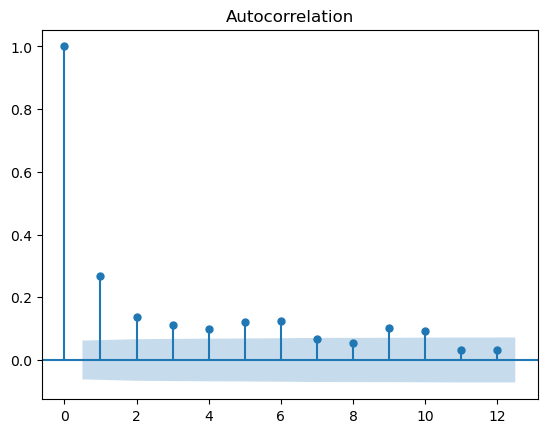

In [27]:
>>> sm.graphics.tsa.plot_pacf(dta_2.values.squeeze(), lags=12)
sm.graphics.tsa.plot_acf(dta_2.values.squeeze(),lags=12)
>>> plt.show()

In [28]:
r,q,p = sm.tsa.acf(dta_2.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print (table.set_index('lag'))

            AC           Q      Prob(>Q)
lag                                     
1.0   0.267265   71.573667  2.670975e-17
2.0   0.136738   90.327290  2.430403e-20
3.0   0.111404  102.788031  3.907861e-22
4.0   0.099766  112.791242  1.847446e-23
5.0   0.120752  127.460370  8.229911e-26
6.0   0.125132  143.228817  2.086198e-28
7.0   0.066961  147.748703  1.205533e-28
8.0   0.055213  150.824826  1.319382e-28
9.0   0.100740  161.075827  4.438458e-30
10.0  0.091719  169.581739  3.386147e-31
11.0  0.032893  170.676845  8.560979e-31
12.0  0.031368  171.673737  2.169953e-30
13.0  0.039585  173.262956  4.004580e-30
14.0  0.051436  175.948865  4.288407e-30
15.0  0.038930  177.489023  7.623657e-30
16.0  0.009632  177.583403  2.568328e-29
17.0  0.057397  180.938148  1.876983e-29
18.0  0.096342  190.399625  8.250680e-31
19.0  0.081927  197.248691  1.199337e-31
20.0  0.058761  200.775589  7.903797e-32
21.0  0.110171  213.186262  9.044721e-34
22.0  0.082405  220.136703  1.246595e-34
23.0  0.077137  

/usr/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/usr/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
